In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from numpy import *

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from linearmodels.iv import IV2SLS
from scipy import stats
from scipy.stats import trim_mean #trimmed mean
from scipy.stats import * #chi2_contingency로 카이제곱통계량계산
from scipy.stats import norm

import keyword
import random

#open api 불러올 때 필요한 것
from urllib.request import urlopen #request package 설치
from bs4 import BeautifulSoup #bs4 package 설치

# 그래프에서 한글 깨지지 않기 위헤 사용함
from matplotlib import rcParams
from matplotlib import font_manager,rc

rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

import FinanceDataReader as fdr
import plotly.graph_objects as go
import plotly.subplots as ms
import math

import tensorflow as tf

import qgrid

# Lecture 13 회귀분석과 머신러닝(2)
## 이항종속변수모형
## 로짓모형

In [2]:
roc=pd.DataFrame([1,2],columns=['data'])
roc

,data
0,1
1,2


In [3]:
roc.iloc[0,0] # 0번째 row의 0번째 column의 값을 가져와라

1

In [4]:
roc.iloc[1,0]

2

In [5]:
roc.iloc[1,1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [7]:
# 없는걸 가져오라 하니까 에러가 남
# 에러나도 되는거만 하게 만드려면..

try:
    a00=roc.iloc[0,0]
    a11=roc.iloc[1,1]
except Exception as e:
    print(e) # 에러가 나오는 이유를 프린트해라
print(a00)

index 1 is out of bounds for axis 0 with size 1
1


In [8]:
df=pd.read_excel('c:/temp/exam_pass.xlsx')
df.head(10)

,hours,pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [10]:
# pass가 이항종속변수임을 알 수 있다

In [11]:
# 상수항 변수 만들자.
# alpha +beta*x니까, alpha *1이라서 '1' 상수항을 만든것
df['const']=1
df.head(10)

,hours,pass,const
0,0.50,0,1
1,0.75,0,1
2,1.00,0,1
3,1.25,0,1
4,1.50,0,1
5,1.75,0,1
6,1.75,1,1
7,2.00,0,1
8,2.25,1,1
9,2.50,0,1


In [12]:
# y: pass, x: const, hours
# 최대우도추정이라는 방법을 사용한다 MLE
logit=sm.Logit(endog=df['pass'],exog=df[['const','hours']]).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                  0.4208
Time:                        19:28:16   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hours          1.5046      0.

In [13]:
# hours coef: 1.5046
# 해석 : 공부시간 많을수록 [로그승산이 증가한다.] = [pr(y=1)일 확률이 증가한다]

In [14]:
# 우리가 하고 싶은건 예측 prediction
# 공부시간이 1시간이면 합격할 확률
# alpha=-4.077, beta=1.504
alpha=-4.077
beta=1.504
z=alpha+beta*1
pr_1=1/(1+np.exp(-z))
print(pr_1)

0.07089643911688731


In [15]:
# 공부시간이 1시간이면 합격할 확률: 7%

In [16]:
# 좀 그럴듯 하게 다시 써보자
alpha=logit.params[0]
beta=logit.params[1]
z=alpha+beta*1
pr_1=1/(1+np.exp(-z))
print(pr_1)

0.07089195989968797


In [18]:
# sigmoid 함수를 이용해 공부를 1~5시간까지 했을 때 합격할 확률을 계산해보자
n=5 # 1~5시간 이니까
total=np.zeros((n,2)) # nx2 비어있는 행렬을 만든다

for i in range(5): # i는 0부터 4까지, i=0~4
    k=i+1 # k = 1 ~ 5
    z=alpha+beta*k
    prob=1/(1+np.exp(-z))
    total[i-1][0]=k # 값을 채워 넣는 과정 : 0번째 칼럼에 k 넣는다 ..??
    total[i-1][1]=prob #첫번째 칼럼에 prob넣는다
total

array([[2.        , 0.25570318],
       [3.        , 0.60735865],
       [4.        , 0.8744475 ],
       [5.        , 0.96909707],
       [1.        , 0.07089196]])

In [21]:
# 2.        , 0.25570318] : 공부하는 시간이 2시간이면, 합격확률 25%
# 합격확률이 가장 크게 증가하는 공부시간 변화는 : 2->3

In [20]:
# 앞을 x, 뒤를 y 축으로 해서 그래프를 그리자

In [24]:
# 위에 결과를 data frame으로 변환해서 그림을 그린다
df1=pd.DataFrame(data=total, columns=['hours','prob'])
df1.sort_values(by=['hours']) # 순서를 hours에 맞게, 그니까 1부터 5까지 순서대로 바ㄱ꿔라 # 왜 안돼??
df1.head()

,hours,prob
0,2.0,0.255703
1,3.0,0.607359
2,4.0,0.874448
3,5.0,0.969097
4,1.0,0.070892


<function matplotlib.pyplot.show(close=None, block=None)>

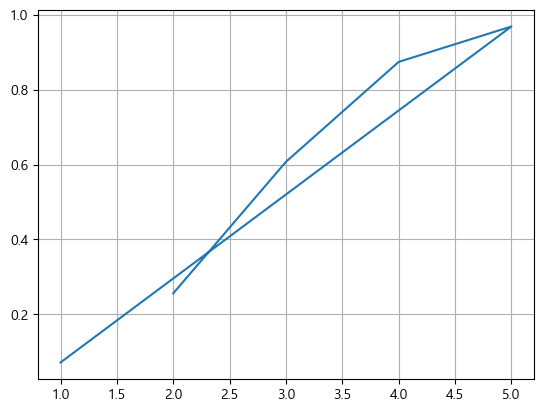

In [25]:
x=df1['hours']
y=df1['prob']
plt.plot(x,y)
plt.grid()
plt.show